<a href="https://colab.research.google.com/github/juliodantas/IA/blob/main/RegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Base_Dados = pd.read_excel('BaseDados_RegressaoLinear.xlsx', 'Plan1')
Base_Dados

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000
...,...,...
94,3185.629581,7279.937858
95,3217.485877,7315.799621
96,3249.660736,7351.661384
97,3282.157343,7387.523147


In [ ]:
Base_Dados.head()

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000


In [ ]:
Base_Dados.tail()

,Salario,Limite_Emprestimo
94,3185.629581,7279.937858
95,3217.485877,7315.799621
96,3249.660736,7351.661384
97,3282.157343,7387.523147
98,3314.978916,7423.384910


In [ ]:
Base_Dados.tail(15)

,Salario,Limite_Emprestimo
84,2883.908902,6689.782736
85,2912.747991,6756.680564
86,2941.875471,6824.247369
87,2971.294226,6892.489843
88,3001.007168,6961.414742
89,3031.017240,7031.028889
90,3061.327412,7101.339178
91,3091.940686,7172.352570
92,3122.860093,7208.214332
93,3154.088694,7244.076095


In [ ]:
Base_Dados.columns

Index(['Salario', 'Limite_Emprestimo'], dtype='object')

In [ ]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
Base_Dados.describe()

,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910


In [ ]:
#Converter valores para Array por questoes de performance

Eixo_x = Base_Dados.iloc[:,0].values
Eixo_y = Base_Dados.iloc[:,1].values

In [ ]:
Eixo_x

array([1250.21913   , 1262.7213213 , 1275.34853451, 1288.10201986,
       1300.98304006, 1313.99287046, 1327.13279916, 1340.40412715,
       1353.80816843, 1367.34625011, 1381.01971261, 1394.82990974,
       1408.77820883, 1422.86599092, 1437.09465083, 1451.46559734,
       1465.98025331, 1480.64005585, 1495.4464564 , 1510.40092097,
       1525.50493018, 1540.75997948, 1556.16757927, 1571.72925507,
       1587.44654762, 1603.32101309, 1619.35422323, 1635.54776546,
       1651.90324311, 1668.42227554, 1685.1064983 , 1701.95756328,
       1718.97713891, 1736.1669103 , 1753.52857941, 1771.0638652 ,
       1788.77450385, 1806.66224889, 1824.72887138, 1842.97616009,
       1861.4059217 , 1880.01998091, 1898.82018072, 1917.80838253,
       1936.98646635, 1956.35633102, 1975.91989433, 1995.67909327,
       2015.6358842 , 2035.79224305, 2056.15016548, 2076.71166713,
       2097.4787838 , 2118.45357164, 2139.63810736, 2161.03448843,
       2182.64483331, 2204.47128165, 2226.51599446, 2248.78115

In [ ]:
Eixo_y

array([2900.124323  , 2929.12556623, 2958.41682189, 2988.00099011,
       3017.88100001, 3048.05981001, 3078.54040811, 3109.32581219,
       3140.41907032, 3171.82326102, 3203.54149363, 3235.57690857,
       3267.93267765, 3300.61200443, 3333.61812447, 3366.95430572,
       3400.62384877, 3434.63008726, 3434.63008726, 3434.63008726,
       3434.63008726, 3574.08984167, 3609.83074009, 3645.92904749,
       3682.38833796, 3719.21222134, 3756.40434356, 3793.96838699,
       3831.90807086, 3870.22715157, 3870.22715157, 3870.22715157,
       3870.22715157, 4027.37389354, 4067.64763247, 4108.3241088 ,
       4149.40734988, 4190.90142338, 4232.81043762, 4275.13854199,
       4317.88992741, 4361.06882669, 4404.67951495, 4448.7263101 ,
       4493.2135732 , 4538.14570894, 4583.52716602, 4629.36243768,
       4675.65606206, 4722.41262268, 4769.63674891, 4817.3331164 ,
       4865.50644756, 4914.16151204, 4963.30312716, 5012.93615843,
       5063.06552001, 5113.69617521, 5164.83313697, 5216.48146

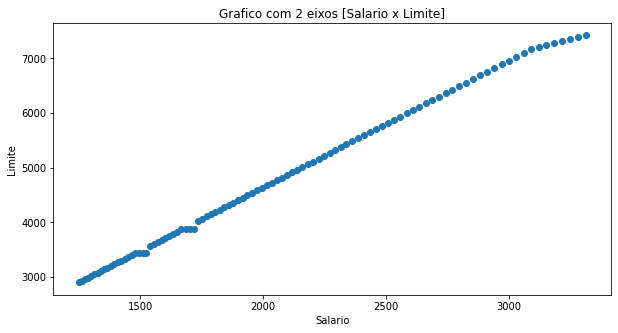

In [ ]:
plt.figure( figsize=(10,5) )
plt.scatter( Eixo_x, Eixo_y);
plt.title('Grafico com 2 eixos [Salario x Limite]')
plt.xlabel('Salario')
plt.ylabel('Limite');

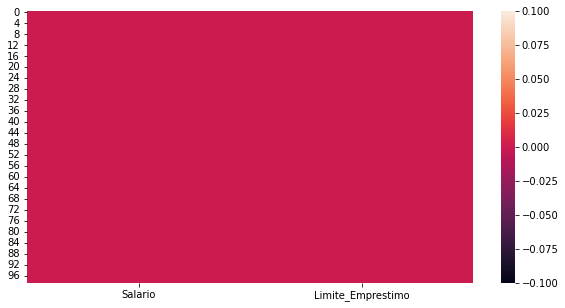

In [ ]:
 plt.figure( figsize=(10,5) )
 sns.heatmap( Base_Dados.isnull());

In [ ]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


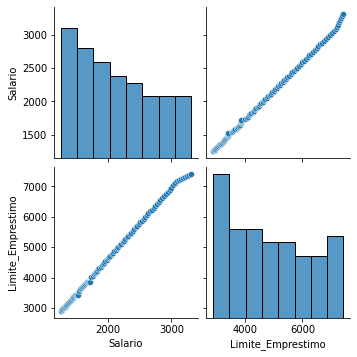

In [ ]:
sns.pairplot( Base_Dados)

In [ ]:
Correlacao = np.corrcoef( Eixo_x, Eixo_y )
Correlacao

array([[1.        , 0.99949773],
       [0.99949773, 1.        ]])

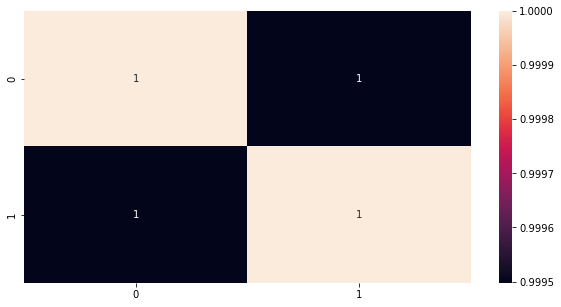

In [ ]:
plt.figure( figsize=(10,5) )
sns.heatmap( Correlacao, annot=True);

In [ ]:
# reshape converte os dados em MATRIZ

Eixo_x = Eixo_x.reshape(-1,1)
Eixo_y = Eixo_x.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    Eixo_x,
    Eixo_y,
    test_size=0.20
)

In [ ]:
print(len( x_treinamento ), len( x_teste) )
print(len( y_treinamento ), len( y_teste) )

79 20
79 20


In [ ]:
from sklearn.linear_model import LinearRegression

Funcao_Regressao = LinearRegression()

Funcao_Regressao.fit( x_treinamento, y_treinamento )

LinearRegression()

In [ ]:
Funcao_Regressao.score( x_treinamento, y_treinamento )

1.0

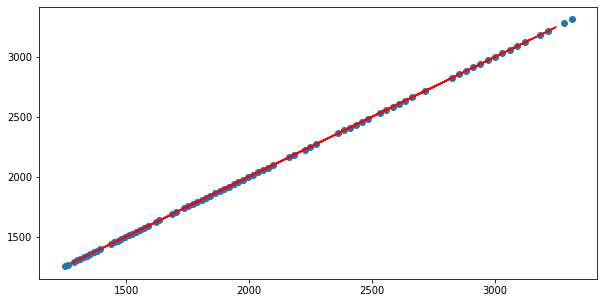

In [ ]:
plt.figure( figsize=(10,5) )
plt.scatter ( x_treinamento, y_treinamento)
plt.plot ( x_teste, Funcao_Regressao.predict(x_teste), color='red');

In [ ]:
#

Previsoes = Funcao_Regressao.predict( x_teste)

from sklearn import metrics
print('RMSE', np.sqrt( metrics.mean_squared_error( y_teste, Previsoes)))

RMSE 1.4380373887290168e-13


In [ ]:
print( Funcao_Regressao.predict( [[ 1800.55555555 ]] ) )

[[1800.55555555]]
